In [1]:
## importing libraries required for animating graph

import jax
import numpy as onp
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# matplotlib widget

import ipywidgets as widgets


In [2]:
# variables X and Y used for 2-dimensional distribution  

N = 160
X = jax.numpy.linspace(-3, 3, N)
Y = jax.numpy.linspace(-3, 4, N)
X, Y = jax.numpy.meshgrid(X, Y)

In [5]:
print(Y)

[[-3.        -3.        -3.        ... -3.        -3.        -3.       ]
 [-2.9559748 -2.9559748 -2.9559748 ... -2.9559748 -2.9559748 -2.9559748]
 [-2.9119496 -2.9119496 -2.9119496 ... -2.9119496 -2.9119496 -2.9119496]
 ...
 [ 3.9119494  3.9119494  3.9119494 ...  3.9119494  3.9119494  3.9119494]
 [ 3.9559746  3.9559746  3.9559746 ...  3.9559746  3.9559746  3.9559746]
 [ 4.         4.         4.        ...  4.         4.         4.       ]]


In [6]:
# Mean vector and covariance matrix

mu = jnp.array([0., 1.])
Sigma = jnp.array([[ 1. , -0.5], [-0.5,  1.5]])

# def say_something(x):
  #  """
   # Print the current widget value in short sentence
   # """
  #  print(f'Widget says: {x}')
 
# widgets.interact(say_something, x=[0, 1, 2, 3])
# widgets.interact(say_something, x=(0, 10, 1))
# widgets.interact(say_something, x=(0, 10, .5))
# = widgets.interact(say_something, x=True)

# Adding interactivity using ipywidgets was entirely a new topic therefore, I tried enough to add interactivity but ran out time. 
# The above commented code belongs to interactivity. 



In [7]:
# Packing variables X and Y into a single 3-dimensional array/numpy

pos = jax.numpy.empty(X.shape + (2,))
pos=pos.at[:,:,0].set(X)
pos=pos.at[:,:,1].set(Y)


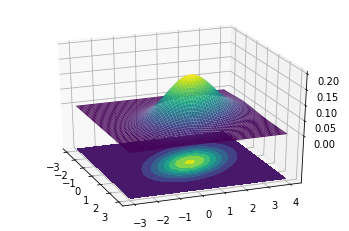

In [8]:
@jit
def Bivariate_gaussian(pos, mu, Sigma):
    """Return the Bivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = jax.numpy.linalg.det(Sigma)
    Sigma_inv = jax.numpy.linalg.inv(Sigma)
    N = jax.numpy.sqrt((2*jnp.pi)**n * Sigma_det)

    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized way across all the input variables. 
    

    fac = jax.numpy.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return jax.numpy.exp(-fac / 2) / N

# The distribution on the variables X and Y packed into pos.

Z = Bivariate_gaussian(pos, mu, Sigma)

# Created a surface plot and projected filled contour plot.

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,cmap=cm.viridis)

ax.grid(True)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjusting the limits, ticks and view angles

ax.set_zlim(-0.15,0.2)
ax.set_zticks(jnp.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

# I have assumed the graph plot to be displayed in 3-D format.  

